# Sobre o Dataset

O conjunto de dados Iris foi utilizado no clássico artigo de 1936 de R.A. Fisher, "The Use of Multiple Measurements in Taxonomic Problems", e também pode ser encontrado no Repositório de Aprendizado de Máquina da UCI.

Ele inclui três espécies de íris, com 50 amostras de cada, além de algumas propriedades de cada flor.

As colunas desse conjunto de dados são:

* Id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species

Disponível em: https://www.kaggle.com/datasets/uciml/iris


# Preparando ambiente

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Baixar dataset Iris do Kaggle
path = kagglehub.dataset_download("uciml/iris")
dataset = pd.read_csv(f"{path}/Iris.csv")

100%|██████████| 3.60k/3.60k [00:00<00:00, 1.20MB/s]

Extracting files...


# Pré-processamento

In [ ]:
print(dataset.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
# Separar atributos (X) e classes (y)
X = dataset.iloc[:, :-1]  # Todas as colunas, exceto a última
y = dataset.iloc[:, -1]    # Última coluna (classe da flor)

# Treinamento

In [ ]:
# Dividir o conjunto em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

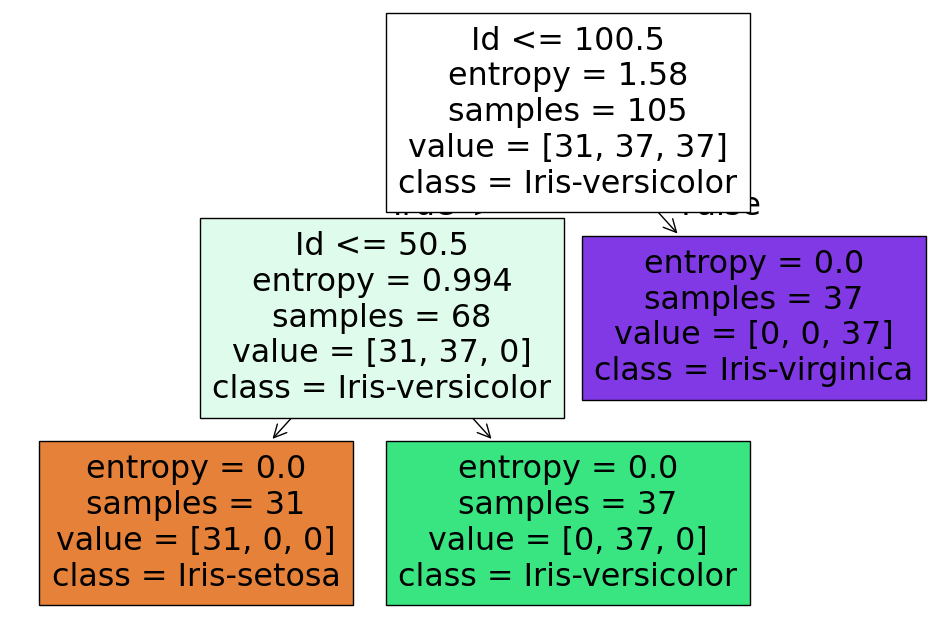

In [ ]:
# Criar e treinar a árvore de decisão
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
plt.show()

# Avaliação

In [ ]:
# Seleciona dados de teste
y_pred = clf.predict(X_test)

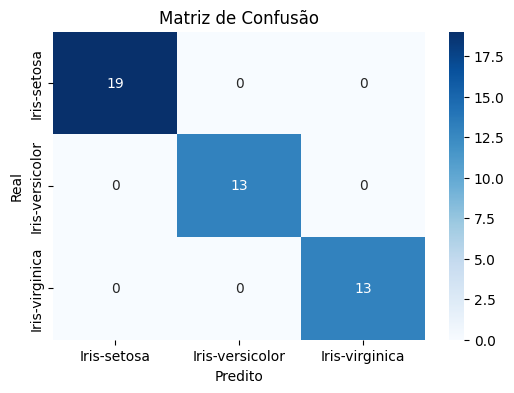

In [ ]:
# Criar matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# Métricas de avaliação
acuracia = min(accuracy_score(y_test, y_pred) * 100, 100)
precisao = precision_score(y_test, y_pred, average="weighted")
revocacao = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Acurácia: {acuracia:.2f}")
print(f"Precisão: {precisao:}")
print(f"Revocação: {revocacao:}")
print(f"Medida-F: {f1:}")

Acurácia: 100.00
Precisão: 1.0
Revocação: 1.0
Medida-F: 1.0
